In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
import fasttext
import seaborn as sns
from matplotlib import pyplot as plt

# I. Analyse 

# Import de la data => kaggle
(sera concatené par la suite)

In [45]:
df1 = pd.read_csv('data/Emotion_final1.csv')

In [46]:
df1

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the gover...,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed ...,fear


In [47]:
df1["Emotion"].count()

21459

In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


In [49]:
df1.describe()

,Text,Emotion
count,21459,21459
unique,21405,6
top,i feel so tortured by it,happy
freq,2,7029


In [50]:
df1["Emotion"].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'happy'],
      dtype=object)

# Import de la data => data_world

In [51]:
df2 = pd.read_csv('data/text_emotion2.csv')

In [52]:
df2.sample(10)

,tweet_id,sentiment,author,content
13852,1964223657,neutral,melissamychel,@opium_war &lt;3?
38036,1753585327,happiness,blissery,"@sentimentalizzy lady in the water is pure bs,..."
24618,1694880992,fun,aanlouise,@jason_mraz http://twitpic.com/4iq19 - popcorn...
9032,1962403289,sadness,Miss_Foxay,@CaroTheNyx aww im sorry im home now hope your...
23507,1694628414,neutral,lisakatherineb,Sky man is quite friendlyand likes joey still...
8661,1962245057,love,jyotigill,@jazzjeet haha you would do that =P that's cut...
27990,1696004632,worry,kellyoneill,@neonbutterfly1 Thank you! I hope you saw the ...
15441,1964841266,neutral,ianmcshane,Got an email from @Unitedairlines telling me I...
2463,1957550054,neutral,patreesho,"Dizzy I wanna lie die, but those calories are..."
25073,1695001906,empty,ashleno,Who wants me to spoil the ending for them?


In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   author     40000 non-null  object
 3   content    40000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [54]:
df2.describe()

,tweet_id
count,4.000000e+04
mean,1.845184e+09
std,1.188579e+08
min,1.693956e+09
25%,1.751431e+09
50%,1.855443e+09
75%,1.962781e+09
max,1.966441e+09


In [55]:
df2["sentiment"].unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [56]:
df2

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...
...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor
39996,1753919001,love,drapeaux,Happy Mothers Day All my love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [57]:
# Supression des colonnes inutiles
df2 = df2.drop(columns=['tweet_id', 'author'])

In [58]:
#Rename pour uniformité
df2.rename(columns={'sentiment': 'Emotion',
                    'content' : 'Text'}, inplace=True)

df2.head()

,Emotion,Text
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


## Dataviz des 2 df

Text(-18.075000000000003, 0.5, 'Count')

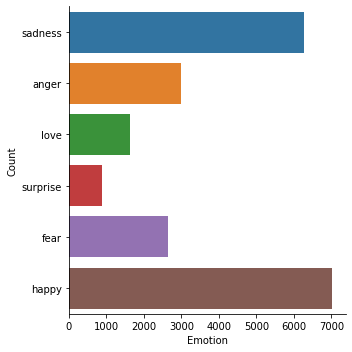

In [59]:
sns.catplot(y='Emotion', kind='count', data=df1) 
plt.xlabel("Emotion") 
plt.ylabel("Count") 

Text(-35.575, 0.5, 'Count')

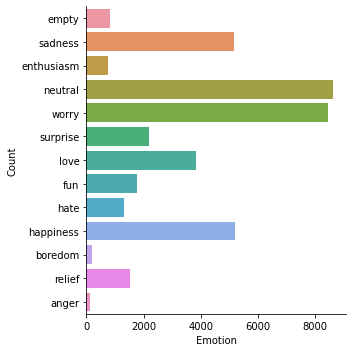

In [60]:
sns.catplot(y='Emotion', kind='count', data=df2) 
plt.xlabel("Emotion") 
plt.ylabel("Count") 

# II. Preprocessing

## Concatenation des 2 datasets

In [61]:
liste_happy = ['happiness','fun','relief','enthusiasm']
liste_sadness = ['sadness','boredom']
liste_anger = ['anger','hate']
liste_fear = ['worry']
liste_love = ['love']
liste_surprise = ['surprise']

In [62]:
df2['Emotion'] = df2['Emotion'].replace(liste_happy,'happy')
df2['Emotion'] = df2['Emotion'].replace(liste_sadness,'sadness')
df2['Emotion'] = df2['Emotion'].replace(liste_anger,'anger')
df2['Emotion'] = df2['Emotion'].replace(liste_fear,'fear')
df2['Emotion'] = df2['Emotion'].replace(liste_love,'love')
df2['Emotion'] = df2['Emotion'].replace(liste_surprise,'surprise')
df2['Emotion']

df2.drop(df2.loc[df2['Emotion']=='empty'].index, inplace=True)
df2.drop(df2.loc[df2['Emotion']=='neutral'].index, inplace=True)

In [63]:
df = pd.concat([df1, df2])
df

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
39994,Succesfully following Tayla!!,happy
39996,Happy Mothers Day All my love,love
39997,Happy Mother's Day to all the mommies out ther...,love
39998,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,happy


Text(-18.075000000000003, 0.5, 'Count')

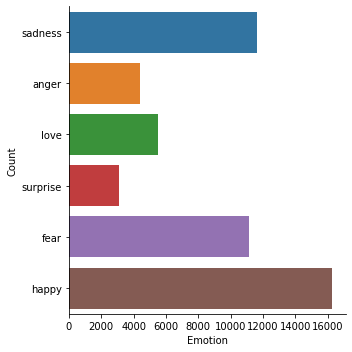

In [64]:
sns.catplot(y='Emotion', kind='count', data=df) 
plt.xlabel("Emotion") 
plt.ylabel("Count")

# III. Data cleaning

In [65]:
df = df.sample(frac=0.1)
#df = df[10000:]

In [66]:
df

,Text,Emotion
9892,i am starting to feel emotional,sadness
6407,i was terrified that the revelation of my feel...,happy
20346,@pixelbase @steverumsby I care about Eurovisio...,happy
18398,i feel rich comments,happy
18943,Hate to break every1's heart but confirmation ...,fear
...,...,...
543,My little foster kittens are getting big...chu...,happy
16725,i feel kind of unwelcome in many catholic comm...,sadness
35639,@creamspyder thanks you've been quiet lately!,love
17264,i feel it is acceptable as this is not everyda...,happy


In [67]:
categories = df.Emotion.unique()
categories

array(['sadness', 'happy', 'fear', 'surprise', 'anger', 'love'],
      dtype=object)

In [68]:
import texthero as hero

In [69]:
df['clean_text'] = hero.clean(df['Text'])

# IV. Représentation (modèle de fréquence) 

In [70]:
df['tfidf_clean_text'] = hero.tfidf(df['clean_text'])

# V. Visualisations

In [71]:
df['pca_tfidf_clean_text'] = hero.pca(df['tfidf_clean_text'])

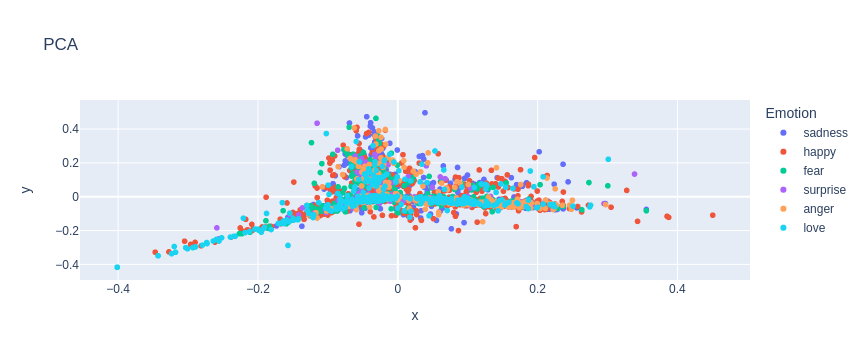

In [72]:
hero.scatterplot(df, col='pca_tfidf_clean_text', color='Emotion', title="PCA")

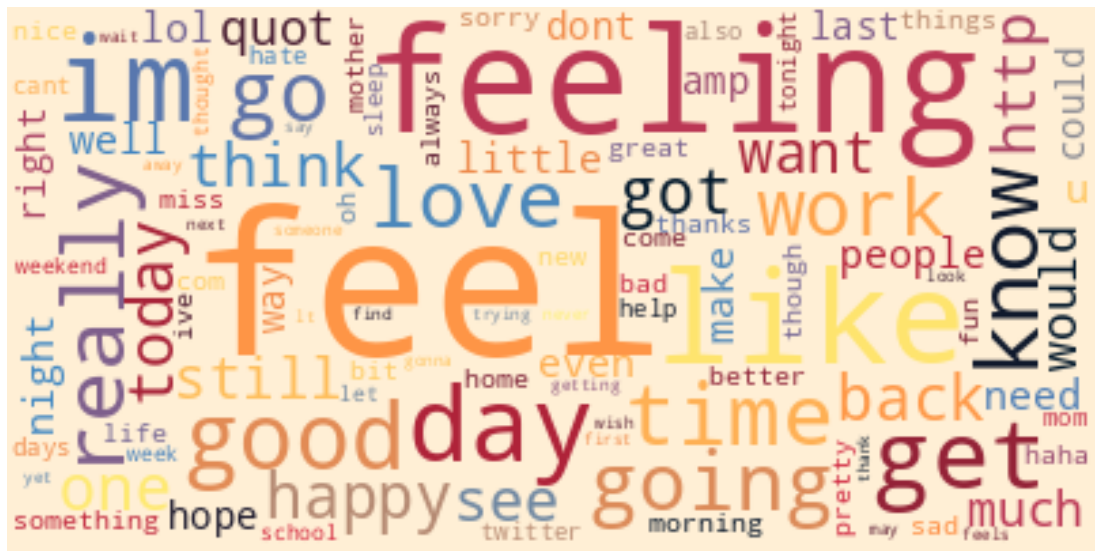

In [73]:
hero.wordcloud(df.clean_text, max_words=100,)

In [74]:
NUM_TOP_WORDS = 5
df.groupby('Emotion')['clean_text'].apply(lambda x: hero.top_words(x)[:NUM_TOP_WORDS])

Emotion          
anger     feel       189
          feeling     85
          like        59
          im          39
          hate        27
fear      feel       171
          feeling    108
          like        81
          get         81
          im          62
happy     feel       521
          feeling    196
          like       171
          im         129
          day        117
love      feel       127
          love        86
          day         76
          happy       61
          like        60
sadness   feel       364
          feeling    204
          like       121
          im         106
          sad         55
surprise  feel        40
          feeling     33
          like        24
          get         20
          im          20
Name: clean_text, dtype: int64

In [75]:
from texthero import stopwords

default_stopwords = stopwords.DEFAULT
custom_stopwords = default_stopwords.union(set(["feel", "feeling", "im", "like"]))
df['clean_text'] = hero.remove_stopwords(df['clean_text'], custom_stopwords)

In [76]:
NUM_TOP_WORDS = 10
df.groupby('Emotion')['clean_text'].apply(lambda x: hero.top_words(x)[:NUM_TOP_WORDS])

Emotion          
anger     hate        27
          even        26
          really      22
          want        21
          know        21
          things      20
          people      18
          still       18
          get         17
          time        17
fear      get         81
          work        53
          know        52
          go          49
          back        48
          day         48
          going       45
          really      45
          think       43
          time        42
happy     day        117
          good       109
          time        81
          get         79
          happy       73
          see         69
          going       63
          really      62
          http        62
          go          62
love      love        86
          day         76
          happy       61
          good        44
          mother      35
          quot        26
          u           24
          mom         22
          mothers     21
       

# VI. FastText

In [77]:
# On divise la base en train et test

X = df


df_train, df_test = train_test_split(X, test_size=0.3, random_state = 1)

In [78]:
df_train['clean_text'] = hero.clean(df_train['Text'])
df_test['clean_text'] = hero.clean(df_test['Text'])

from texthero import stopwords
default_stopwords = stopwords.DEFAULT
custom_stopwords = default_stopwords.union(set(["feel", "feeling", "im", "like"]))

df_train['clean_text'] = hero.remove_stopwords(df_train['clean_text'], custom_stopwords)
df_test['clean_text'] = hero.remove_stopwords(df_test['clean_text'], custom_stopwords)

/tmp/ipykernel_19006/4246234690.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_19006/4246234690.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_19006/4246234690.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1

In [79]:
df_train['clean_text'] = hero.clean(df_train['Text'])
df_test['clean_text'] = hero.clean(df_test['Text'])
from texthero import stopwords
default_stopwords = stopwords.DEFAULT
custom_stopwords = default_stopwords.union(set(["feel", "feeling", "im", "like"]))

df_train['clean_text'] = hero.remove_stopwords(df_train['clean_text'], custom_stopwords)
df_test['clean_text'] = hero.remove_stopwords(df_test['clean_text'], custom_stopwords)

/tmp/ipykernel_19006/358927345.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_19006/358927345.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_19006/358927345.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1900

In [80]:
df_train["target"] = df_train[["Emotion"]].apply(lambda x: '__label__' + x)


df_test["target"] = df_test[["Emotion"]].apply(lambda x: '__label__' + x)

/tmp/ipykernel_19006/1070025736.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_19006/1070025736.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [81]:
df_train.head()

,Text,Emotion,clean_text,tfidf_clean_text,pca_tfidf_clean_text,target
19731,i feel as devastated as i do right now i canno...,sadness,devastated right cannot imagine family feels,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.10653817640134579, -0.026874429463914953]",__label__sadness
39,i need you i need someone i need to be protect...,happy,need need someone need protected safe small f...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.07294589596872363, -0.035818949757565624]",__label__happy
17097,i am asleep i would feel no pain but that viol...,anger,asleep would pain violent act would completel...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.09724993771879795, -0.0436000564758441]",__label__anger
13670,Holidays are now over - not fair!!,sadness,holidays fair,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.02456555638562225, -0.008928009711805691]",__label__sadness
5741,i understand that chronically living makes som...,fear,understand chronically living makes healthy pe...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.095014438411842, -0.035255801580378325]",__label__fear


In [82]:
# Saving the CSV file as a text file to train/test the classifier
import csv
df_train[['target', 'clean_text']].to_csv('train.txt', index = False, sep = ' ', header = None,quoting = csv.QUOTE_NONE, quotechar = "", escapechar = " ")
df_test[['target', 'clean_text']].to_csv('test.txt', index = False, sep = ' ', header = None,quoting = csv.QUOTE_NONE, quotechar = "", escapechar = " ")

In [83]:
model = fasttext.train_supervised('train.txt', wordNgrams = 2)

Read 0M words
Number of words:  8658
Number of labels: 6
Progress: 100.0% words/sec/thread:  257042 lr:  0.000000 avg.loss:  1.687644 ETA:   0h 0m 0s


In [45]:
model.test('test.txt')  

(624, 0.32371794871794873, 0.32371794871794873)

In [ ]:
import mlflow
import mlflow.fasttext
from urllib.parse import urlparse

import warnings
warnings.filterwarnings('ignore')

# On crée une nouvelle expérimentation
# experiment_id = mlflow.create_experiment("NLP_projet")

with mlflow.start_run(experiment_id = 1):

    tags = {'model_name':type(model).__name__,
            'model_description':model_description,
            'encoding':type(tokenizer).__name__,
            'loss':loss,
            'optimizer':optimizer,
            'metric':metric,
            'layer_activation':layer_activation,
            'output_activation':output_activation,
            'epoch':history.epoch[-1],
            'loss_train':history.history[loss][-1],
            'accuracy_train':history.history['sparse_categorical_accuracy'][-1],
            'loss_val':history.history['val_loss'][-1],
            'accuracy_val':history.history['val_sparse_categorical_accuracy'][-1],
           }
    # tags.update({'words_rooting':words_rooting})
    mlflow.set_tags(tags)